# QUESTIONS WE WILL COVER IN THIS PROJECT 
1. What is the average revenue generated per customer?
2. What are the top 5 countries by total revenue?
3. What is the total revenue generated by each product?
4. How many unique customers are there in the dataset?
5. What is the total revenue generated on each day?
6. What is the distribution of revenue among different age groups?
7. How does the unit price compare to the unit cost for each product?
8. Are there any seasonal trends in revenue?
9. What is the distribution of order quantity for each gender?
10. How does the revenue vary over time for each product category?

In [1]:
# we will be ansering the questions after EDA and MLO part C:\Users\Rohith\Desktop\Bike_Sales_Prepare_Lab_3.4.7.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

## Data has been extracted from the phpmyadmin server 



In [3]:
df=pd.read_excel(r'C:\Users\Rohith\Downloads\Bike_Sales_Prepare_Lab_3.4.7.xlsx')

In [4]:
df.head()

,COUSTOMER NAME,Date,Age,Customer_Gender,Country,Product,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue
0,Prasanna Lakshmi Payasam,2021-12-01,39,Female,United States,xpulse 200 blue,4.0,1252,2295,5008,9180
1,Suman Katte,2021-12-01,44,Male,United KingdoMale,KTM 125 duke,1.0,1266,2320,1266,2320
2,Jaipal Potanapudi,2021-12-02,37,Male,United States,Royal Enfield,2.0,420,769,840,1538
3,Dinanath Simhambhatla,2021-12-02,31,Female,Australia,Royal Enfield,1.0,420,769,420,769
4,Mayur Kousika,2021-12-03,37,Female,United States,xpulse 200 blue,2.0,0,2295,0,4590


In [5]:
df.columns

Index(['COUSTOMER NAME', 'Date', 'Age', 'Customer_Gender', 'Country',
       'Product', 'Order_Quantity', ' Unit_Cost ', ' Unit_Price ', ' Cost ',
       'Revenue'],
      dtype='object')

In [6]:
df['Product'].unique()

array(['xpulse 200 blue', 'KTM 125 duke', 'Royal Enfield',
       'Xpulse 200 Red', 'Honda dio', 'Pulser 220 F'], dtype=object)

In [7]:
df.dtypes

COUSTOMER NAME             object
Date               datetime64[ns]
Age                         int64
Customer_Gender            object
Country                    object
Product                    object
Order_Quantity            float64
 Unit_Cost                  int64
 Unit_Price                 int64
 Cost                       int64
Revenue                     int64
dtype: object

<Axes: >

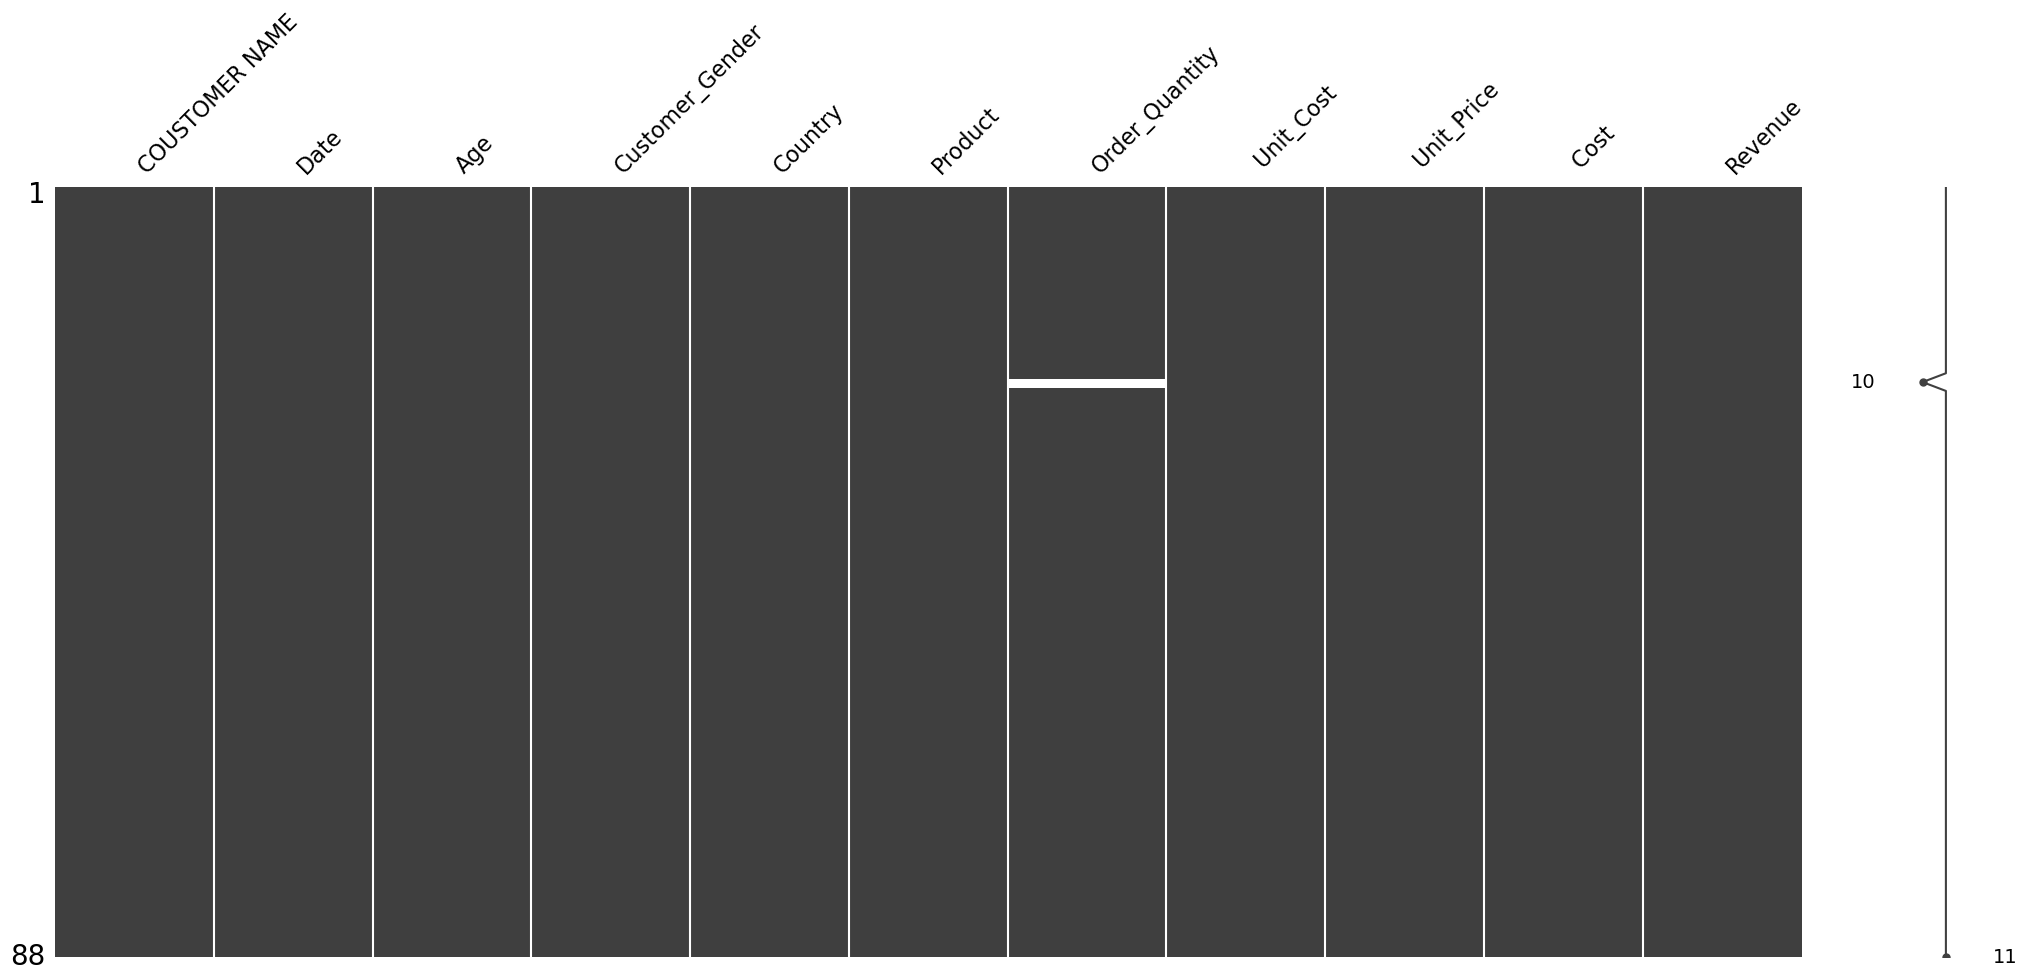

In [8]:
import missingno as mn
mn.matrix(df)

In [9]:
df['Order_Quantity']=df['Order_Quantity'].fillna(df['Order_Quantity'].mean())

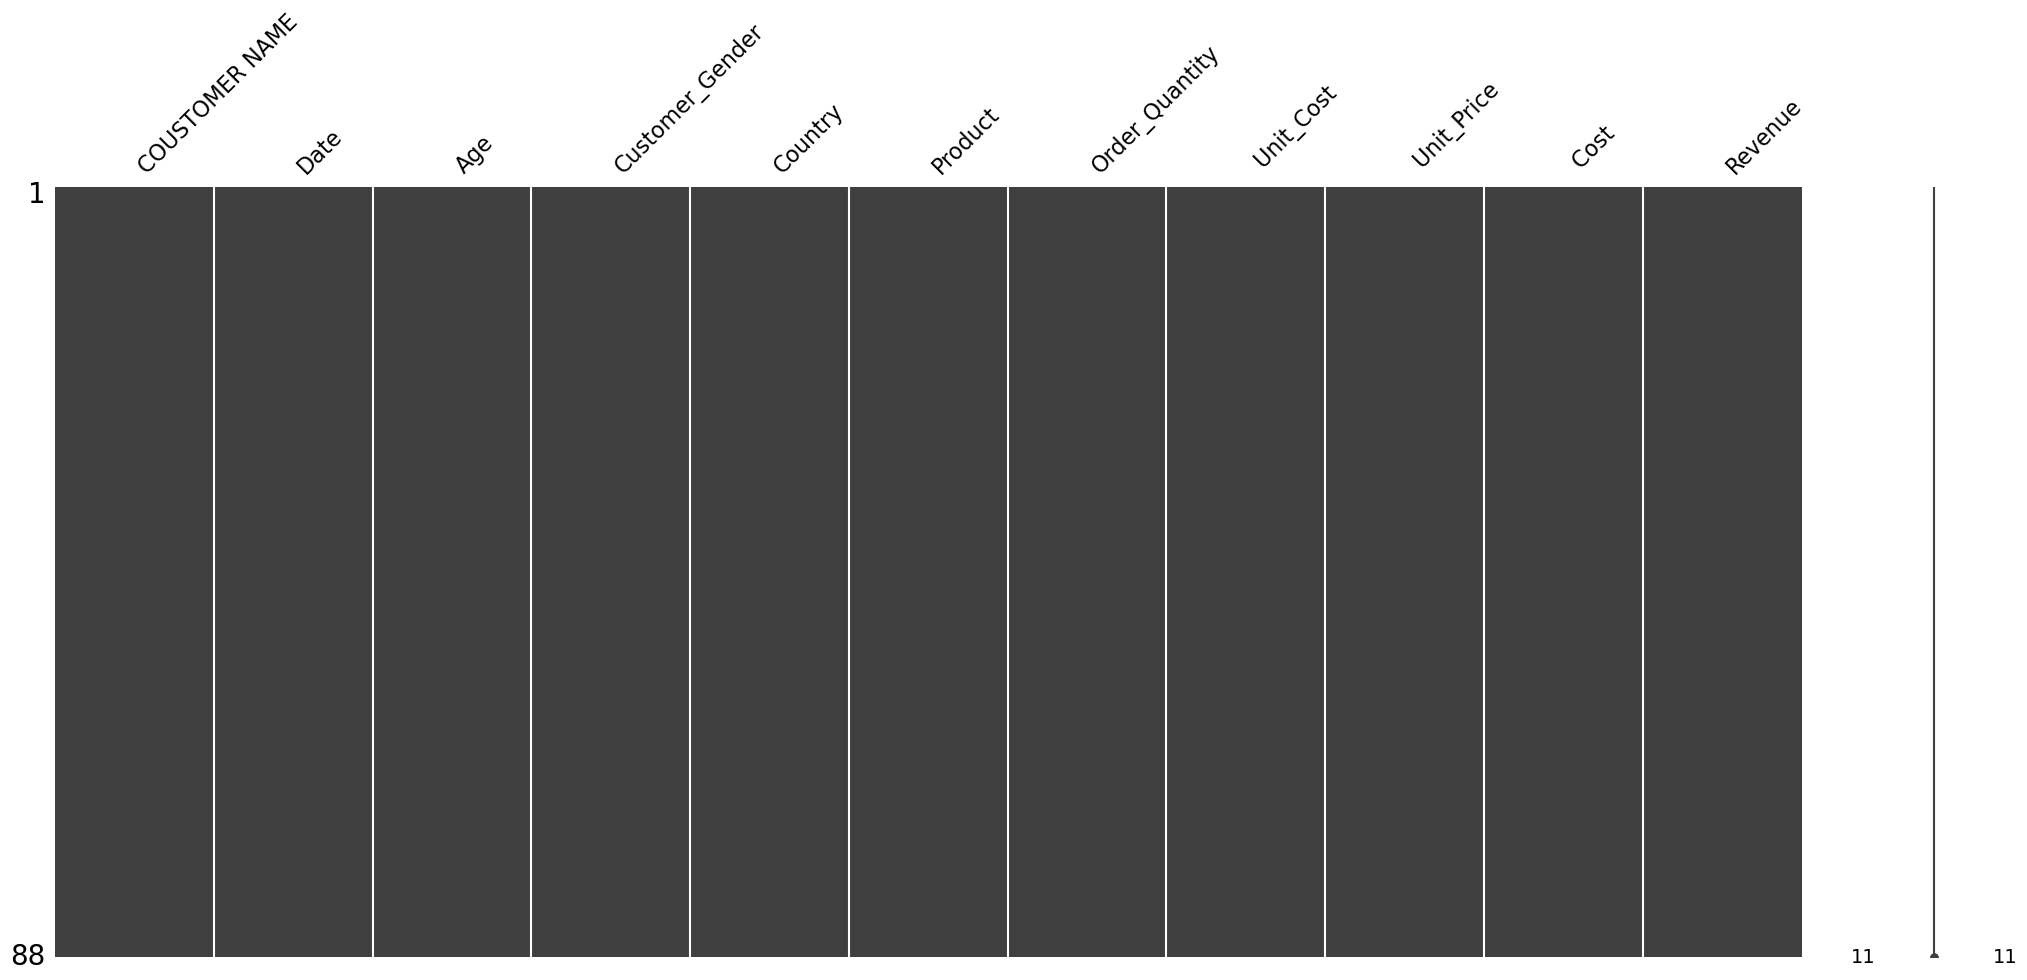

<Figure size 800x600 with 0 Axes>

In [10]:
import missingno as mn
mn.matrix(df)
plt.figure(figsize=(8, 6))
plt.show()

In [11]:
import seaborn as sns

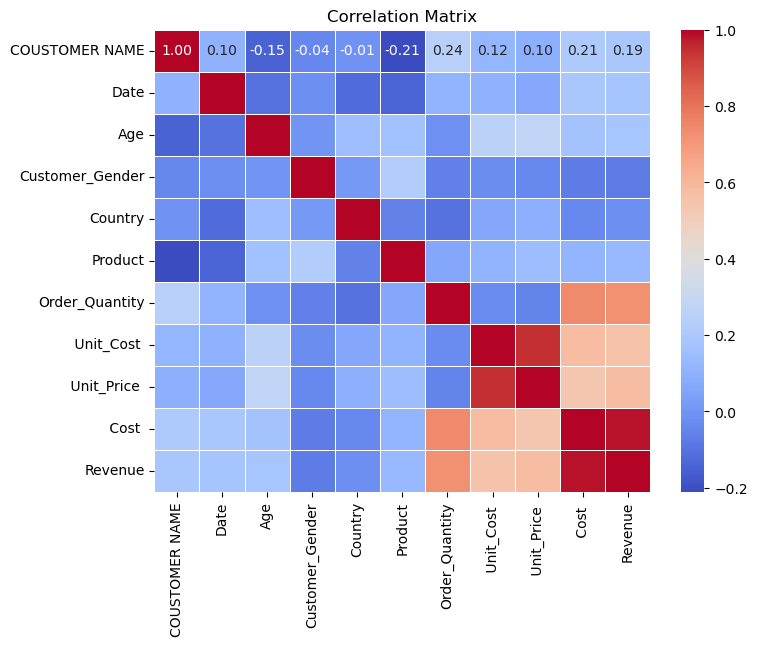

In [12]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['COUSTOMER NAME']=LE.fit_transform(df['COUSTOMER NAME'])
df['Customer_Gender']=LE.fit_transform(df['Customer_Gender'])
df['Country']=LE.fit_transform(df['Country'])
df['Product']=LE.fit_transform(df['Product'])
df['Date']=LE.fit_transform(df['Date'])
corr = df.corr()
# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [13]:
df.corrwith(df['Revenue']).sort_values(ascending=False)# from this we get to know the coorelative attributes

Revenue            1.000000
 Cost              0.982392
Order_Quantity     0.724928
 Unit_Price        0.575635
 Unit_Cost         0.554713
COUSTOMER NAME     0.192761
Age                0.182486
Date               0.180891
Product            0.133053
Country           -0.019412
Customer_Gender   -0.076673
dtype: float64

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Define features (X) and target variable (y)
X = df.drop(columns=['Revenue'])  # Features
y = df['Revenue']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Accuracy: 0.7777777777777778
Mean Squared Error: 437991.6111111111


Now lets start answering the questions



In [15]:
#1.What is the average revenue generated per customer?

average_revenue_per_customer = df['Revenue'].sum() / df['COUSTOMER NAME'].nunique()
print("Average revenue per customer:", average_revenue_per_customer.round())



Average revenue per customer: 13204.0


In [16]:
#2. What are the top 5 countries by total revenue?

top_countries_revenue = df.groupby('Country')['Revenue'].sum().nlargest(5)
print("Top 5 countries by total revenue:")
print(top_countries_revenue)


Top 5 countries by total revenue:
Country
7    123421
1    108430
3     46175
4     30010
2     20080
Name: Revenue, dtype: int64


In [17]:
#3. What is the total revenue generated by each product?

product_revenue = df.groupby('Product')['Revenue'].sum()
print("Total revenue generated by each product:")
print(product_revenue)

Total revenue generated by each product:
Product
0      5940
1    120590
2     33750
3     18456
4      5650
5    172125
Name: Revenue, dtype: int64


In [18]:
#4. How many unique customers are there in the dataset?

unique_customers = df['COUSTOMER NAME'].nunique()
print("Number of unique customers:", unique_customers)


Number of unique customers: 27


In [19]:
#5. What is the total revenue generated on each day?

daily_revenue = df.groupby('Date')['Revenue'].sum()
print("Total revenue generated on each day:")
print(daily_revenue)


Total revenue generated on each day:
Date
0     11500
1      2307
2     11475
3         0
4     22975
5      9217
6      7716
7     16130
8      9070
9     14310
10    13807
11    21586
12    12115
13     7704
14     2320
15    11500
16     7729
17    32307
18    69650
19    28940
20     8498
21    21320
22     5155
23     9180
Name: Revenue, dtype: int64


C:\Users\Rohith\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rohith\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


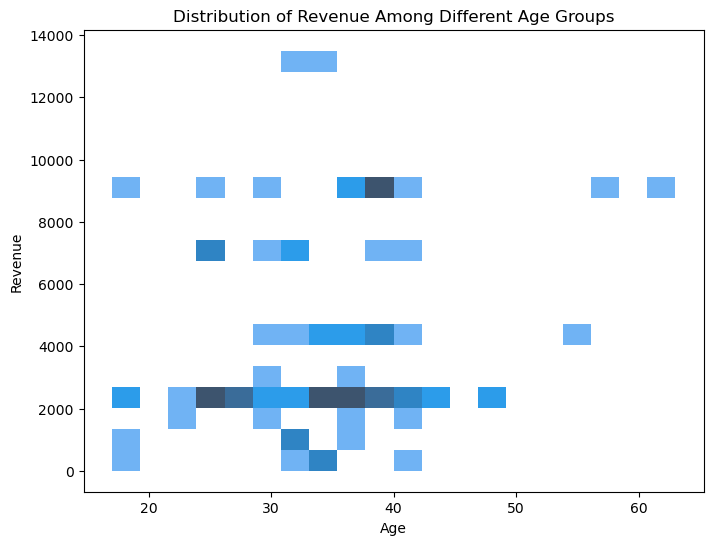

In [20]:
#6. What is the distribution of revenue among different age groups?

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', y='Revenue', bins=20)
plt.title('Distribution of Revenue Among Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.show()
import warnings
# Filter out FutureWarnings from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

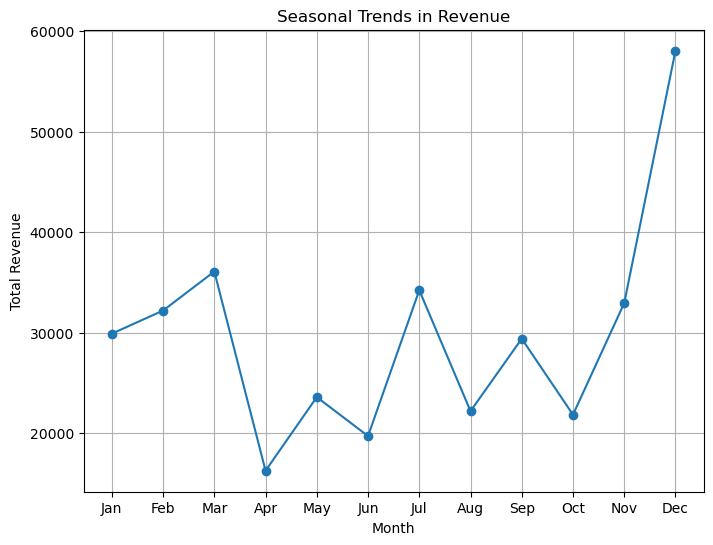

In [32]:
#8. Are there any seasonal trends in revenue?
df = pd.read_excel(r'C:\Users\Rohith\Desktop\Bike_Sales_Prepare_Lab_3.4.7.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)
df['Month'] = df['Date'].dt.month
monthly_revenue = df.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(8, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Seasonal Trends in Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


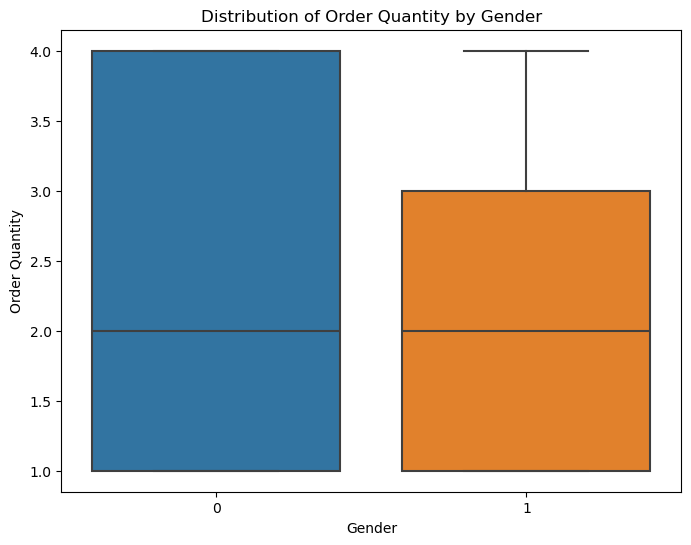

In [22]:
#9. What is the distribution of order quantity for each gender?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer_Gender', y='Order_Quantity', data=df)
plt.title('Distribution of Order Quantity by Gender')
plt.xlabel('Gender')
plt.ylabel('Order Quantity')
plt.show()

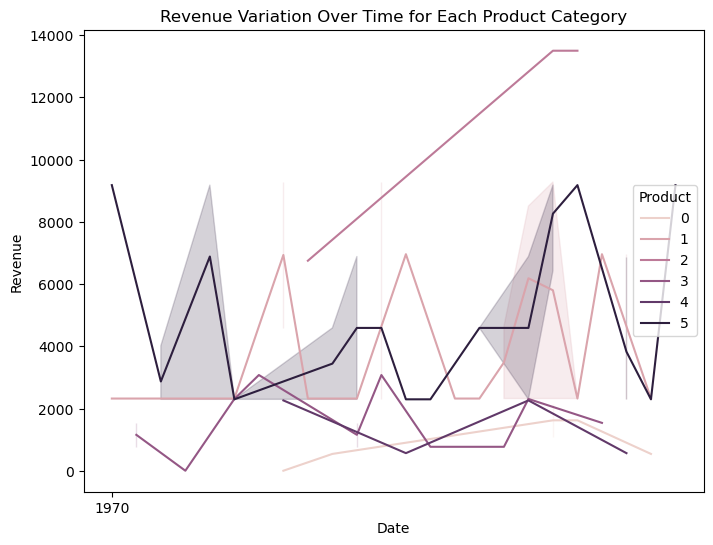

In [23]:
#10. How does the revenue vary over time for each product category?
plt.figure(figsize=(8, 6))
sns.lineplot(x='Date', y='Revenue', hue='Product', data=df)
plt.title('Revenue Variation Over Time for Each Product Category')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title='Product')
plt.show()


[Link Text](https://docs.google.com/spreadsheets/d/1b8eJiLSgJJLWfiRf3UiKO_bdl0ije-8K/edit#gid=1556946462)2